<center>
    <h3>Programación - Grado en Ciencia de Datos</h3>
    <h3>Universitat Politècnica de València</h3>
    <h1>Práctica 1 - Parte I. Análisis de datos tabulados: delitos en la ciudad de Chicago</h1>
</center>

**Práctica realizada por:**
- MARC GÓMEZ CIDAD
- VÍCTOR LORENZO LÓPEZ

<a id='indice'></a>
## Índice
1. ### [Objetivos](#objetivos)
1. ### [Actividad 1: Cargar datos en un dataframe](#act1)
1. ### [Actividad 2: Datos faltantes](#act2)
1. ### [Actividad 3: Tipos de delito](#act3)
1. ### [Actividad 4: Crear columnas Day, Month y Hour](#act4)
1. ### [Actividad 5: Frecuencia de delitos en función del día, mes y hora](#act5)
1. ### [Actividad 6: Localización geográfica de los delitos](#act6)

<a id='objetivos'></a>
## Objetivos:
- Aprender a analizar y visualizar datos tabulados (estructurados en filas y columnas) mediante la realización de operaciones básicas (ordenación, selección, agrupamiento, agregación, ...)
- Aprender a usar los tipos de datos **DataFrame** y **Series** de la biblioteca pandas.
- Utilizar la interfaz orientada a objetos de la biblioteca **matplotlib** para representar gráficamente los datos del estudio.

<a id='act1'></a>
## ACTIVIDAD 1: Cargar datos en un DataFrame

Almacena el fichero `"Crimes_2014.csv"` en un dataframe de pandas y muestra las 5 primeras filas. El fichero contiene como separador de campos la coma (separador por defecto de la función `read_csv`).

[Volver al índice](#indice)

In [1]:
import pandas as pd
df = pd.read_csv('Crimes_2014.csv', sep = ',')
df.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,10503710,HZ244646,08/01/2014 12:00:00 AM,056XX S RICHMOND ST,1752,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,RESIDENCE,False,False,...,14.0,63,20,NaN,NaN,2014,05/02/2016 03:52:24 PM,NaN,NaN,NaN
1,10505693,HZ247349,12/27/2014 12:00:00 PM,011XX W 102ND ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,...,34.0,73,11,NaN,NaN,2014,05/02/2016 03:52:24 PM,NaN,NaN,NaN
2,10210043,HX560497,12/31/2014 07:50:00 AM,009XX N ST LOUIS AVE,2014,NARCOTICS,MANU/DELIVER: HEROIN (WHITE),VEHICLE NON-COMMERCIAL,True,False,...,27.0,23,18,NaN,NaN,2014,05/03/2016 03:49:13 PM,NaN,NaN,NaN
3,10210122,HX507186,11/14/2014 06:10:00 PM,057XX S RACINE AVE,2025,NARCOTICS,POSS: HALLUCINOGENS,SIDEWALK,True,False,...,16.0,68,18,NaN,NaN,2014,05/03/2016 03:49:13 PM,NaN,NaN,NaN
4,10395520,HZ131734,12/25/2014 12:01:00 AM,079XX S WESTERN AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,True,True,...,18.0,70,08B,NaN,NaN,2014,05/03/2016 03:49:13 PM,NaN,NaN,NaN


<a id='act2'></a>
## ACTIVIDAD 2: Datos faltantes

Muestra las filas del dataset en las que falte algún valor. A continuación, borra dichas filas del dataframe.

> **Nota:** Puedes consultar el tutorial *Manejo de datos tabulados con pandas DataFrame* (fichero `pandas_dataframe.ipynb`) disponible en el apartado de *Tutoriales* de PoliformaT para ver cómo operar con datos faltantes.

[Volver al índice](#indice)

In [2]:
df.loc[df.isnull().any(axis='columns')]

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,10503710,HZ244646,08/01/2014 12:00:00 AM,056XX S RICHMOND ST,1752,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,RESIDENCE,False,False,...,14.0,63,20,NaN,NaN,2014,05/02/2016 03:52:24 PM,NaN,NaN,NaN
1,10505693,HZ247349,12/27/2014 12:00:00 PM,011XX W 102ND ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,...,34.0,73,11,NaN,NaN,2014,05/02/2016 03:52:24 PM,NaN,NaN,NaN
2,10210043,HX560497,12/31/2014 07:50:00 AM,009XX N ST LOUIS AVE,2014,NARCOTICS,MANU/DELIVER: HEROIN (WHITE),VEHICLE NON-COMMERCIAL,True,False,...,27.0,23,18,NaN,NaN,2014,05/03/2016 03:49:13 PM,NaN,NaN,NaN
3,10210122,HX507186,11/14/2014 06:10:00 PM,057XX S RACINE AVE,2025,NARCOTICS,POSS: HALLUCINOGENS,SIDEWALK,True,False,...,16.0,68,18,NaN,NaN,2014,05/03/2016 03:49:13 PM,NaN,NaN,NaN
4,10395520,HZ131734,12/25/2014 12:01:00 AM,079XX S WESTERN AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,True,True,...,18.0,70,08B,NaN,NaN,2014,05/03/2016 03:49:13 PM,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274318,10503527,HZ244449,11/14/2014 08:00:00 AM,013XX W 14TH ST,2826,OTHER OFFENSE,HARASSMENT BY ELECTRONIC MEANS,"SCHOOL, PUBLIC, GROUNDS",False,False,...,2.0,28,26,NaN,NaN,2014,04/29/2016 03:47:33 PM,NaN,NaN,NaN
274319,10210156,HX149534,02/13/2014 09:20:00 AM,011XX N CICERO AVE,1506,PROSTITUTION,SOLICIT ON PUBLIC WAY,STREET,True,False,...,37.0,25,16,NaN,NaN,2014,04/30/2016 03:49:39 PM,NaN,NaN,NaN
274732,10503740,HZ244554,12/01/2014 12:01:00 AM,003XX N JEFFERSON ST,1261,DECEPTIVE PRACTICE,UNAUTHORIZED VIDEOTAPING,APARTMENT,False,False,...,42.0,28,11,NaN,NaN,2014,04/30/2016 03:51:13 PM,NaN,NaN,NaN
274733,10504998,HZ246118,10/10/2014 09:00:00 AM,021XX W 21ST ST,1154,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT $300 AND UNDER,APARTMENT,False,False,...,25.0,31,11,NaN,NaN,2014,05/01/2016 03:47:06 PM,NaN,NaN,NaN


<a id='act3'></a>
## ACTIVIDAD 3: Tipos de delito

> **Nota:** Puedes consultar el tutorial *Introducción a la visualización de datos con matplotlib* (fichero `introduccion_matplotlib.ipynb`) disponible en el apartado de *Tutoriales* de PoliformaT para ver cómo crear figuras con matplotlib utiizando la interfaz orientada a objetos.

1. Muestra los distintos tipo de delito registrados. Para ello, selecciona la columna 'Primary Type' y ejecuta la función `unique()` sobre esta selección para mostrar únicamente un elemento de cada tipo.
1. Muestra un diagrama de barras horizontal con el número de delitos de cada tipo. Para ello:
    1. Usa `value_counts` para contar cuántos delitos hay de cada tipo. Esta función devuelve un objeto de tipo `Series`, en el que el atributo `index` son las etiquetas de la serie (tipos de delito) y el atributo `values` los valores.
    1. Ordena la serie anterior de manera ascendente.
    1. Crea y muestra una gráfica de barras horizontal con el método `barh` aplicado a un objeto de tipo `Axes`. El primer parámetro deberá ser los tipos de delito y el segundo las cantidades. El objeto `Axes` se devuelve, junto a la figura de la que forma parte, cuando llamas a `plt.suplots()`:
    ```
    fig, ax = plt.subplots()
    ```    
    1. Personaliza la figura:
    
        - Utiliza `figsize` para adecuar el tamaño. Puedes pasarlo como valor a la llamada:
        
        ```
        fig, ax = plt.subplots(figsize=(10,10))
        ```       
        
        - Utiliza el método `ax.grid(axis='x')` para mostrar las líneas verticales de una rejilla.
        - Utiliza el método `ax.set_title` para poner un título a la gráfica.
                
[Volver al índice](#indice)

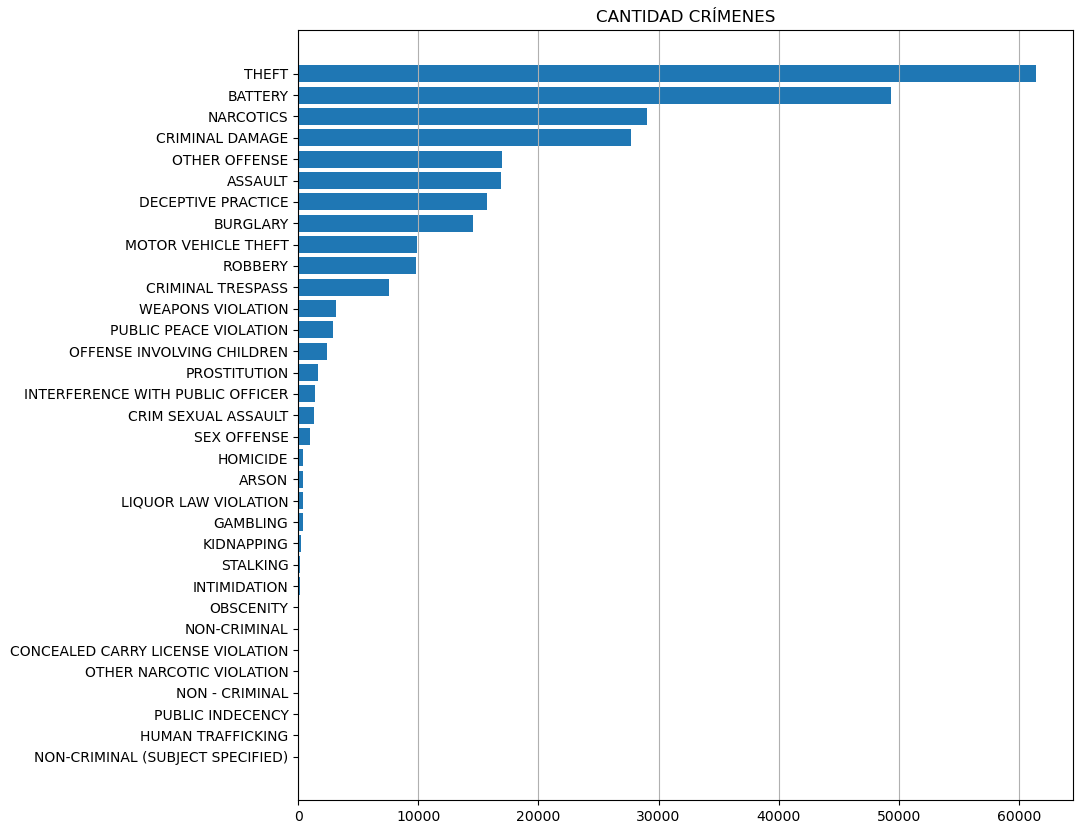

In [3]:
import matplotlib.pyplot as plt

tipos_delito = df['Primary Type'].unique()
cantidad = df['Primary Type'].value_counts().sort_values()
fig, ax = plt.subplots(figsize=(10,10))
ax.barh(cantidad.index, cantidad.values)
ax.grid(axis='x')
ax.set_title('CANTIDAD CRÍMENES')
None


<a id='act4'></a>
## ACTIVIDAD 4: Crear columnas Day, Month y Hour

En el dataframe cargado, el campo 'Date' contiene la fecha del delito en formato "mm/dd/aaaa hh:mm:ss AM|PM". Si queremos analizar los datos en función del día, el mes, la hora, etc., conviene separar este campo y crear columnas específicas para el día, el mes, etc. Esto puede hacerse mediante las funciones `map` o `apply`. La segunda es más flexible y potente, pero muy lenta para dataframes con muchas filas, por lo que usaremos la primera.

1. Consulta el tutorial `pandas_dataframe.ipynb` mencionado anteriormente para entender el uso de la función `map`.
1. Implementa las funciones `get_dia` y `get_hora` de modo similar a como está implementada `get_mes`. La función `get_hora` debe, además, convertir la hora de formato 12h a formato 24h. Para ello, en primer lugar se deberá dejar la hora en el rango [0-11] mediante la operación `%12`y, a continuación, si el último campo de la fecha es 'PM', se deberá sumar 12 a este valor.

    > **Nota:** No se pide `get_año` porque el dataframe ya tiene un campo `Year`.

1. Utiliza la función `map` para crear en el dataframe las nuevas columnas 'Day', 'Month' y 'Hour'
1. Muestra las primeras filas del dataframe resultante y comprueba que se hayan creado correctamente las nuevas columnas.

[Volver al índice](#indice)

In [4]:
import re

def get_mes(fecha):
    '''
    Recibe una fecha con formato "mm/dd/aaaa hh:mm:ss AM|PM"
    Devuelve el mes mm convertido a tipo int
    '''
    items =  re.split(':|/| ', fecha)  # Lista con cada uno de los campos que componen la fecha por separado  
    return int(items[0])

# COMPLETAR
def get_dia(fecha):
    items =  re.split(':|/| ', fecha)  # Lista con cada uno de los campos que componen la fecha por separado  
    return int(items[1])

import re

def get_hora(fecha):
    items = re.split(':|/| ', fecha)
    hora = items[3:7]
    hora[0] = int(hora[0]) % 12
    if hora[3] == 'PM':
        hora[0] += 12
    hora = '{:02d}:{:02d}:{:02d}'.format(hora[0], int(hora[1]), int(hora[2]))
    return hora


df['Mes'] = df['Date'].map(get_mes)
df['Día'] = df['Date'].map(get_dia)
df['Hora'] = df['Date'].map(get_hora)
df.head()



,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,Mes,Día,Hora
0,10503710,HZ244646,08/01/2014 12:00:00 AM,056XX S RICHMOND ST,1752,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,RESIDENCE,False,False,...,NaN,NaN,2014,05/02/2016 03:52:24 PM,NaN,NaN,NaN,8,1,00:00:00
1,10505693,HZ247349,12/27/2014 12:00:00 PM,011XX W 102ND ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,...,NaN,NaN,2014,05/02/2016 03:52:24 PM,NaN,NaN,NaN,12,27,12:00:00
2,10210043,HX560497,12/31/2014 07:50:00 AM,009XX N ST LOUIS AVE,2014,NARCOTICS,MANU/DELIVER: HEROIN (WHITE),VEHICLE NON-COMMERCIAL,True,False,...,NaN,NaN,2014,05/03/2016 03:49:13 PM,NaN,NaN,NaN,12,31,07:50:00
3,10210122,HX507186,11/14/2014 06:10:00 PM,057XX S RACINE AVE,2025,NARCOTICS,POSS: HALLUCINOGENS,SIDEWALK,True,False,...,NaN,NaN,2014,05/03/2016 03:49:13 PM,NaN,NaN,NaN,11,14,18:10:00
4,10395520,HZ131734,12/25/2014 12:01:00 AM,079XX S WESTERN AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,True,True,...,NaN,NaN,2014,05/03/2016 03:49:13 PM,NaN,NaN,NaN,12,25,00:01:00


<a id='act5'></a>
## ACTIVIDAD 5: Frecuencia de delitos en función del día, mes y hora

Una vez creadas las columnas Day, Month, Year y Hour, podemos analizar los datos en función de estas variables. 

- Muestra gráficas de barras verticales del número de delitos en función de la hora, día y mes, con el objetivo de detectar si hay alguna relación entre estas variables y la actividad delictiva.
- Muestra también una gráfica de barras del número de delitos en función del mes, en este caso particularizado únicamente para los delitos relacionados con el juego (`Primary Type = GAMBLING`).
- Muestra las cuatro gráficas en una sola figura. Consulta los tutoriales mencionados anteriormente para ver cómo crear múltiples gráficas en una sola figura.

[Volver al índice](#indice)

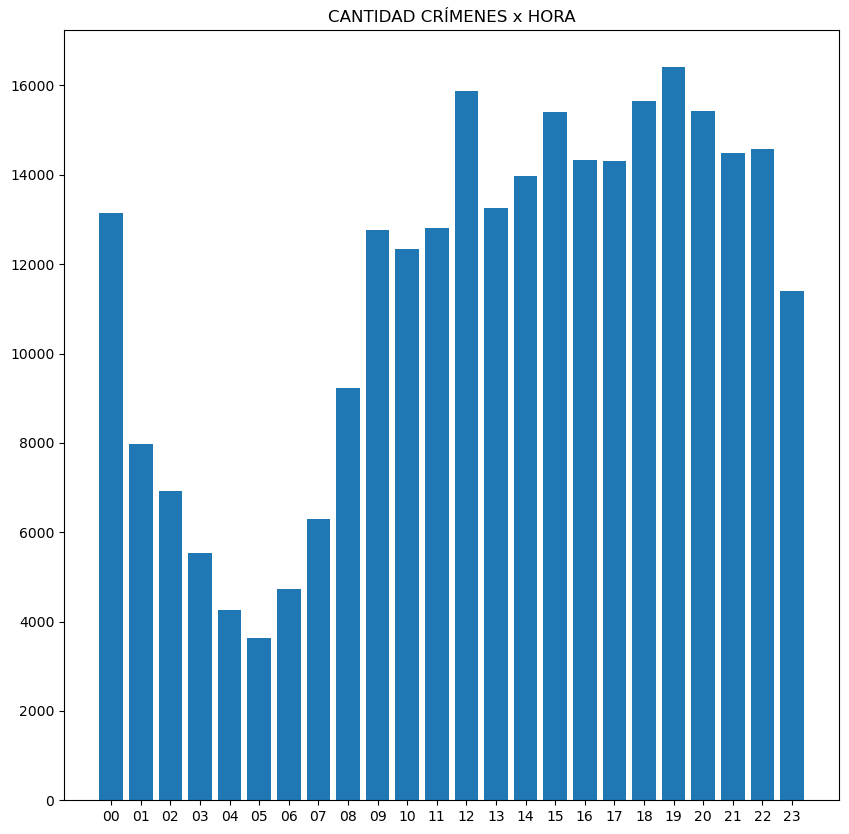

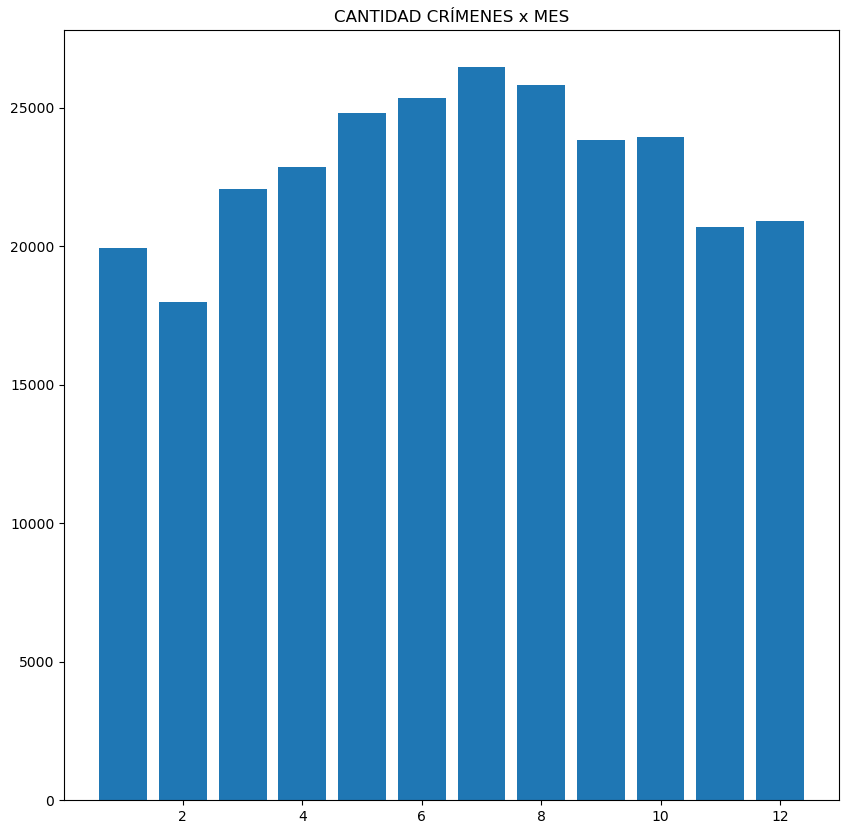

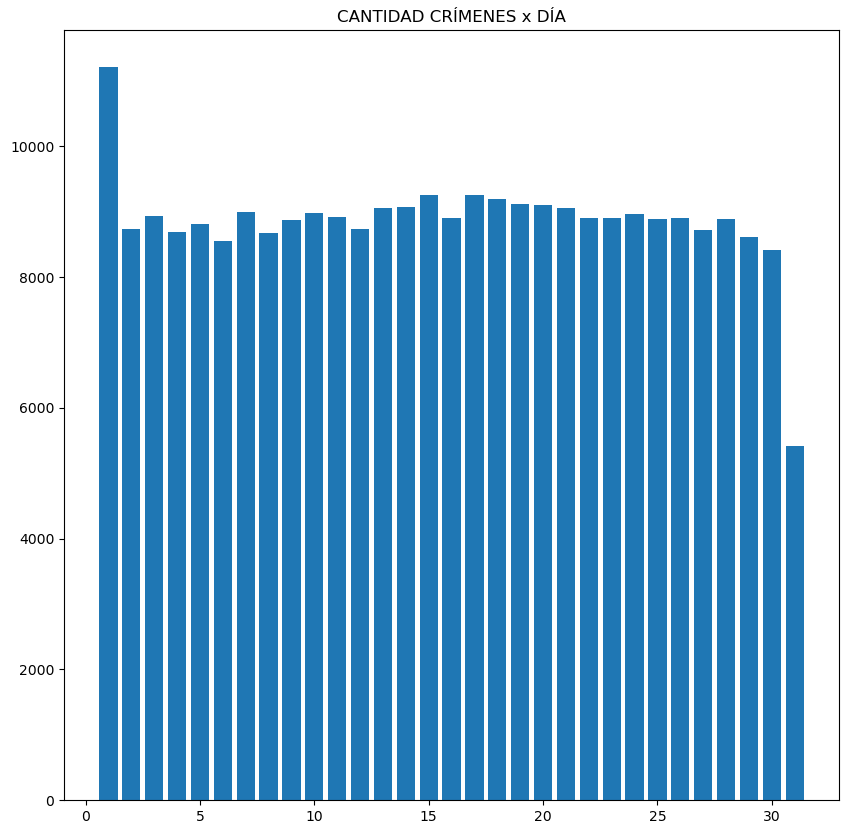

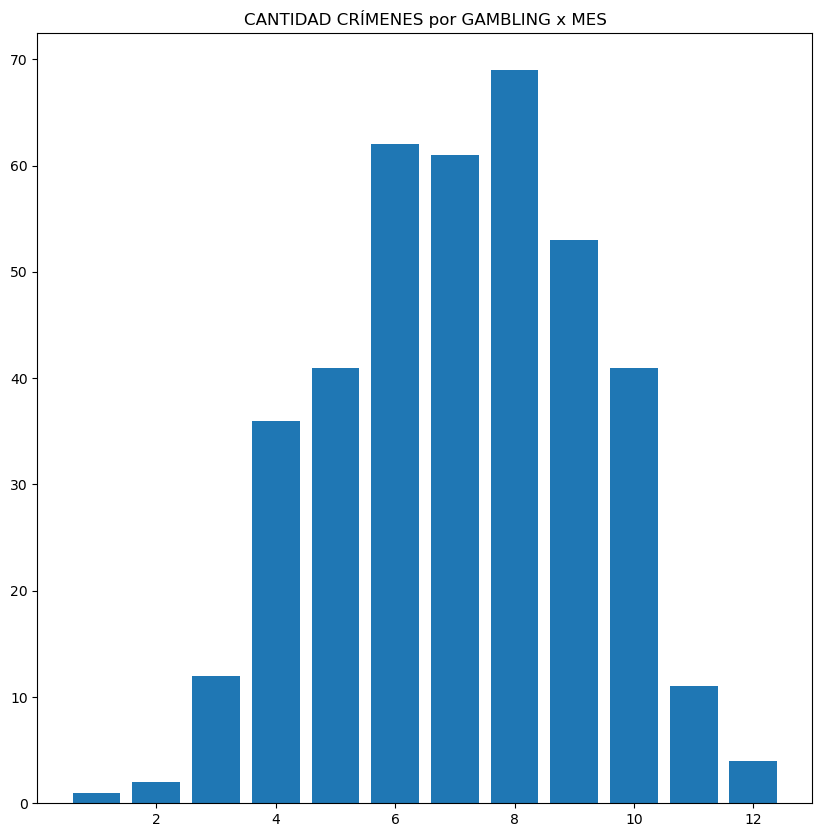

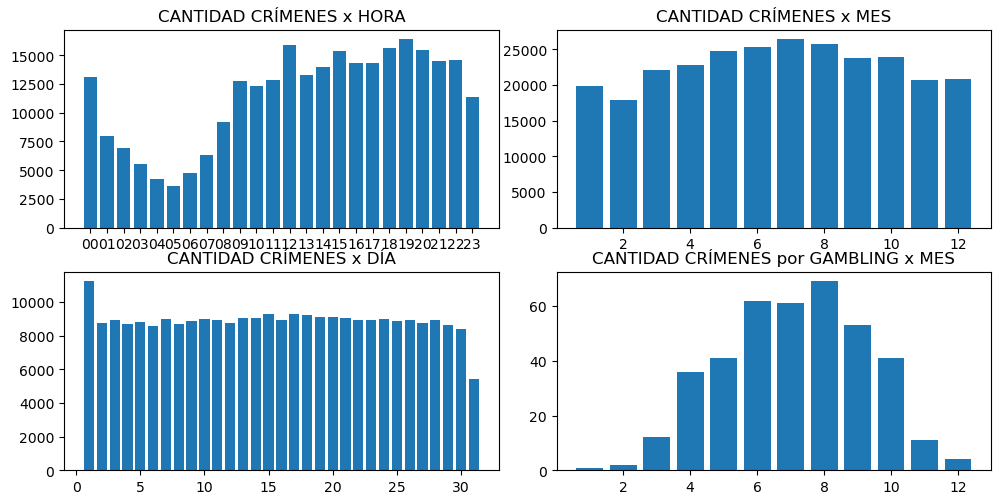

In [8]:
import matplotlib.pyplot as plt

import re
def get_hora_solo(fecha):
    items = re.split(':|/| ', fecha)
    hora = items[3:7]
    hora[0] = int(hora[0]) % 12
    if hora[3] == 'PM':
        hora[0] += 12
    hora = '{:02d}'.format(hora[0])
    return hora
df['Hora_solo'] = df['Date'].map(get_hora_solo)

cantidad_hora = df['Hora_solo'].value_counts().sort_index()
fig, ax = plt.subplots(figsize=(10,10))
ax.bar(cantidad_hora.index, cantidad_hora.values)
ax.set_title('CANTIDAD CRÍMENES x HORA')
None
cantidad_mes = df['Mes'].value_counts().sort_values()
fig, ax = plt.subplots(figsize=(10,10))
ax.bar(cantidad_mes.index, cantidad_mes.values)
ax.set_title('CANTIDAD CRÍMENES x MES')
None
cantidad_dia = df['Día'].value_counts().sort_values()
fig, ax = plt.subplots(figsize=(10,10))
ax.bar(cantidad_dia.index, cantidad_dia.values)
ax.set_title('CANTIDAD CRÍMENES x DÍA')
None

gb = df.loc[df['Primary Type'] == 'GAMBLING']
cantidad_mes_gb = gb['Mes'].value_counts().sort_values()
fig, ax = plt.subplots(figsize=(10,10))
ax.bar(cantidad_mes_gb.index, cantidad_mes_gb.values)
ax.set_title('CANTIDAD CRÍMENES por GAMBLING x MES')
None

fig, ax = plt.subplots(2,2, figsize=(10,5))
plt.tight_layout()

ax[0,0].set_title('CANTIDAD CRÍMENES x HORA')
ax[0,0].bar(cantidad_hora.index, cantidad_hora.values)

ax[0,1].set_title('CANTIDAD CRÍMENES x MES')
ax[0,1].bar(cantidad_mes.index, cantidad_mes.values)

ax[1,0].set_title('CANTIDAD CRÍMENES x DÍA')
ax[1,0].bar(cantidad_dia.index, cantidad_dia.values)

ax[1,1].set_title('CANTIDAD CRÍMENES por GAMBLING x MES')
ax[1,1].bar(cantidad_mes_gb.index, cantidad_mes_gb.values)
None

<a id='act6'></a>
## ACTIVIDAD 6: Localización geográfica de los delitos

Con el fin de visualizar la distribución geográfica de los delitos, muestra un *scatter plot* con las variables 'Latitude' frente a 'Longitude'. 

1. Utiliza el método `ax.scatter(x,y)` aplicado sobre un objeto `ax` de tipo `Axes` para generar el gráfico, donde `x` debe ser la longitud e `y` la latitud.
1. Observa que el tamaño de los puntos es excesivamente grande en relación al tamaño de la gráfica. Para corregirlo, añade el parámetro `s=0.01` en la llamada al método `scatter` para cambiar el tamaño de los puntos, y añade el parámetro `figsize=(10, 10)` a `plt.subplots` para cambiar el tamaño de la figura.
1. Con el fin de comprobar si ciertos delitos se localizan en puntos concretos de la ciudad, sobreimprime otro *scatter plot* con la geolocalización de los delitos de juego (`Primary Type = GAMBLING`). Pon el tamaño del punto a 1 y el color magenta (`s=1, c='magenta'` en `ax.scatter`).
1. Haz lo mismo para los delitos de prostitución (`Primary Type = PROSTITUTION`). Pon el tamaño del punto a 1 y el color `'red'`.

[Volver al índice](#indice)

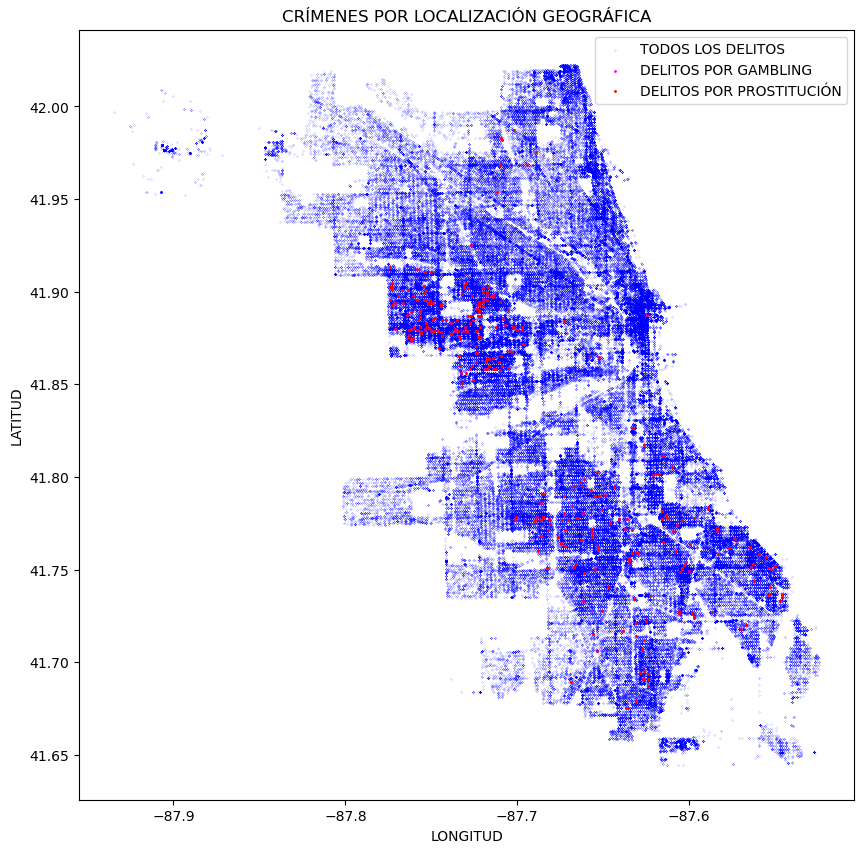

In [6]:
fig, ax = plt.subplots(figsize=(10,10))

long = df['Longitude']
lat = df['Latitude']
ax.scatter(long, lat, s=0.01, c='blue')
None

gb = df[df['Primary Type'] == 'GAMBLING']
gb_long = gb['Longitude']
gb_lat = gb['Latitude']
ax.scatter(gb_long,gb_lat, s=1, c='magenta')
None

pr = df[df['Primary Type'] == 'PROSTITUTION']
pr_long = gb['Longitude']
pr_lat = gb['Latitude']
ax.scatter(pr_long,pr_lat, s=1, c='red')
ax.legend(['TODOS LOS DELITOS','DELITOS POR GAMBLING','DELITOS POR PROSTITUCIÓN'])
ax.set_title('CRÍMENES POR LOCALIZACIÓN GEOGRÁFICA')
ax.set_xlabel('LONGITUD')
ax.set_ylabel('LATITUD')
None